<a href="https://colab.research.google.com/github/Naren8520/Serie-de-tiempo-con-Machine-Learning/blob/main/Supuestos_de_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                           Supuestos de Regresión

                  Elaborado por: Naren Castellon
            
Comprobar los supuestos del modelo es como comentar código. Todo el mundo debería hacerlo a menudo, pero a veces termina siendo pasado por alto en la realidad. No hacer cualquiera de los dos puede resultar en una gran cantidad de tiempo de confusión,


Contenido
<br><a href="#linealidad">1. Linealidad</a>
<br><a href="#mean">2. Media de residuos</a>
<br><a href="#homo">3. Comprobar la homocedasticidad</a>
<br><a href="#normal">4. Comprobar la normalidad de los términos/residuales de error</a>
<br><a href="#auto">5. Sin autocorrelación de residuos</a>
<br><a href="#multico">6. Sin multicolinealidad perfecta</a>
<br><a href="#other">7. Otros modelos para comparar</a>


In [ ]:
# Preprocesado de datos
# ==============================================================================
import numpy as np
import pandas as pd


from statsmodels.tsa.seasonal import seasonal_decompose 
# No presentar advertencias
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Visualización
# ==============================================================================
import matplotlib.pyplot as plt
%matplotlib inline 
import hvplot.pandas
import plotly.express as px
import matplotlib.ticker as ticker
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams["figure.figsize"] = (12, 8)
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)

El conjunto de datos contiene estadísticas sobre las ventas de un producto en 200 mercados diferentes, junto con los presupuestos publicitarios en cada uno de estos mercados para diferentes canales de medios: TV, radio y periódicos.

Las ventas están en miles de unidades y el presupuesto en miles de dólares.

In [ ]:
ad_data = pd.read_csv("data/Advertising.csv",)
ad_data=ad_data.drop("Unnamed: 0", axis=1)
ad_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
ad_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


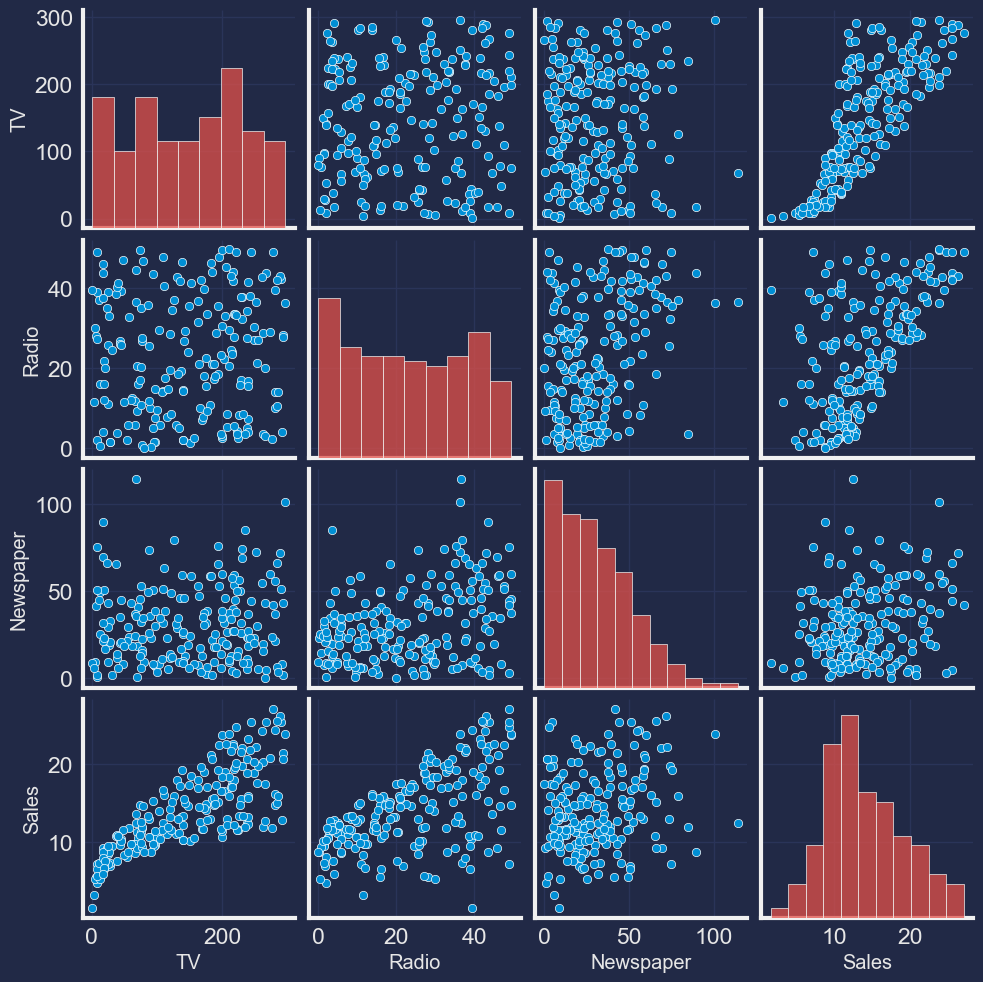

In [ ]:
plt.rcParams["figure.figsize"] = (16, 5)
p = sns.pairplot(ad_data)

# Supuestos de Regresión Lineal

## <a id="Linealidad">1. Linealidad</a>


Esto supone que existe una relación lineal entre los predictores (por ejemplo, variables o características independientes) y la variable de respuesta (por ejemplo, variable dependiente o etiqueta). Esto también supone que los predictores son aditivos.

**Por qué puede suceder:** Puede que no solo haya una relación lineal entre los datos. El modelado consiste en tratar de estimar una función que explica un proceso, y la regresión lineal no sería un estimador adecuado (juego de palabras) si no hay una relación lineal.

**A qué afectará:** Las predicciones serán extremadamente inexactas porque nuestro modelo es inadecuado. Esta es una violación grave que no debe ser ignorada.

**Cómo detectarlo:** Si solo hay un predictor, esto es bastante fácil de probar con un diagrama de dispersión. La mayoría de los casos no son tan simples, por lo que tendremos que modificar esto mediante el uso de un diagrama de dispersión para ver nuestros valores predichos frente a los valores reales (en otras palabras, ver los residuos). Idealmente, los puntos deben estar en o alrededor de una línea diagonal en el diagrama de dispersión.

**Cómo solucionarlo:** Ya sea agregando términos polinómicos a algunos de los predictores o aplicando transformaciones no lineales. Si no funcionan, intente agregar variables adicionales para ayudar a capturar la relación entre los predictores y la etiqueta.

In [ ]:
scat1=ad_data.hvplot.scatter(x='TV', y='Sales',  
                  legend='top', height=300, width=300, color="red")

scat2=ad_data.hvplot.scatter(x='Radio', y='Sales',  
                  legend='top', height=300, width=300,color="lime")
scat3=ad_data.hvplot.scatter(x='Newspaper', y='Sales',  
                  legend='top', height=300, width=300, color="black")
layout = scat1+scat2+scat3
layout

:Layout
   .Scatter.I   :Scatter   [TV]   (Sales)
   .Scatter.II  :Scatter   [Radio]   (Sales)
   .Scatter.III :Scatter   [Newspaper]   (Sales)

>Al observar los gráficos, podemos ver que con la variable Ventas, ninguna de las variables independientes forman una forma lineal precisa, pero la TV y la Radio aún funcionan mejor que el Periódico, que parece no tener una forma específica. Por lo tanto, muestra que un ajuste de regresión lineal podría no ser el mejor modelo para ello. Es posible que un modelo lineal no pueda explicar *eficientemente* los datos en términos de variabilidad, precisión de predicción, etc.

Un consejo es recordar ver siempre las gráficas desde donde está la variable dependiente en el eje y. Aunque no variaría mucho la forma, pero así es la intuición de la regresión lineal, poner la variable dependiente como y y las independientes como x(s).

Ahora, el resto de los supuestos requieren que realicemos la regresión antes de que podamos verificarlos. Así que vamos a realizar una regresión en él.

### Modelo de Regresión Lineal

In [ ]:
x = ad_data.drop(["Sales"],axis=1)
y = ad_data.Sales

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

In [ ]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.9072183330817297


## <a id="mean">2. Media de los Residuos</a>

Los residuos, como sabemos, son las diferencias entre el valor real y el valor predicho. Uno de los supuestos de la regresión lineal es que la media de los residuos debe ser cero. Así que averigüémoslo.

In [ ]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Media de los Residuos {}".format(mean_residuals))

Media de los Residuos -7.283063041541026e-16


In [ ]:
residuals.shape

(150,)

Como podemos ver, la media de los residuo es casi cero

## <a id="homo">3. Supuesto de Homocedasticidad</a>

La homocedasticidad significa que los residuos tienen una varianza igual o casi igual a lo largo de la línea de regresión. Al graficar los términos de error con los términos predichos, podemos verificar que no debería haber ningún patrón en los términos de error.

**Por qué puede suceder:** Nuestro modelo puede estar dando demasiado peso a un subconjunto de los datos, particularmente donde la varianza de error fue la mayor.

**A qué afectará:** Pruebas de significación para coeficientes debido a que los errores estándar están sesgados. Además, los intervalos de confianza serán demasiado amplios o demasiado estrechos.

**Cómo detectarlo:** Traza los residuos y mira si la varianza parece ser uniforme.

**Cómo solucionarlo:** La heterocedasticidad (¿puede decir que me gustan las palabras de escedasticidad?) se puede resolver utilizando la regresión de mínimos cuadrados ponderados en lugar del OLS estándar o transformando las variables dependientes o altamente sesgadas. Realizar una transformación de registro en la variable dependiente no es un mal lugar para comenzar.

### ¡Detectando heteroscedasticidad!
La heterocedasticidad, la violación de la homocedasticidad, ocurre cuando no tenemos una variación uniforme entre los términos de error.

**Método gráfico:** primero realice el análisis de regresión y luego represente los términos de error contra los valores predichos ($\hat y_i$). Si hay un patrón definido (como lineal, cuadrático o en forma de embudo) obtenido del diagrama de dispersión, entonces hay heterocedasticidad.

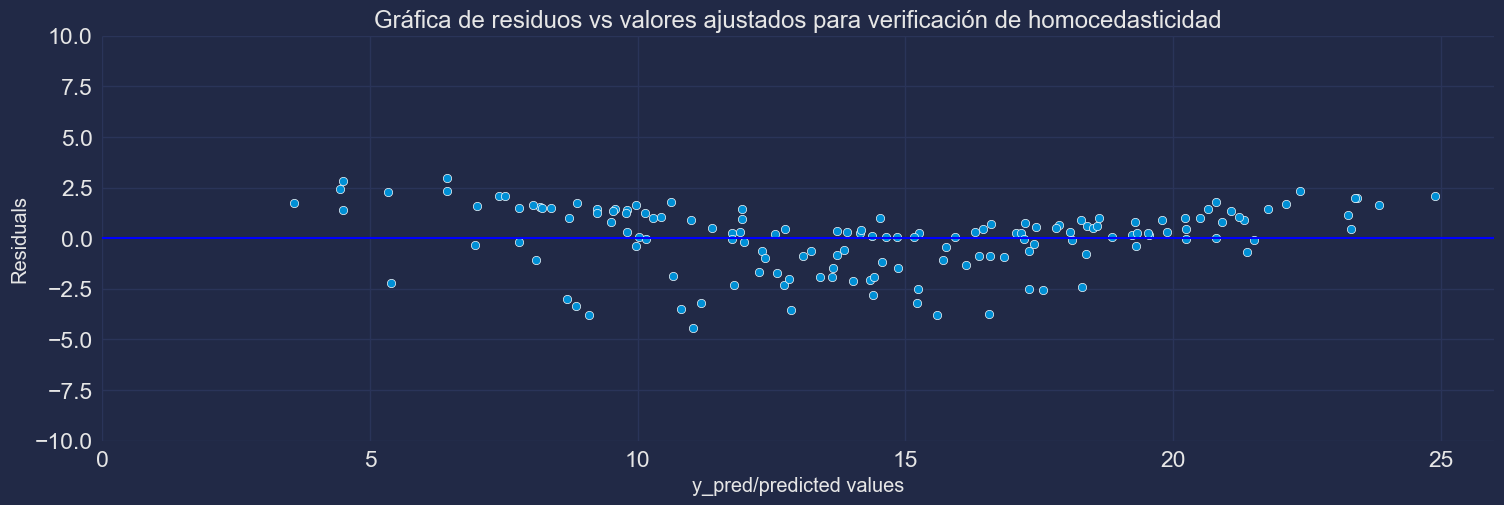

In [ ]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Gráfica de residuos vs valores ajustados para verificación de homocedasticidad')
plt.show()

### Ahora estaremos aplicando pruebas.
Un consejo es tener en cuenta que si queremos un 95 % de confianza en nuestros resultados y pruebas, entonces el valor p debe ser inferior a 0,05 para poder rechazar la hipótesis nula. Recuerde, un investigador o científico de datos siempre intentará rechazar la hipótesis nula.

##  Prueba de Cuantificación de Goldfeld
Comprobación de la heteroscedasticidad: Usando Goldfeld Quandt probamos la heteroscedasticidad.
* Hipótesis Nula: Los términos de error son homocedásticos
* Hipótesis alternativa: Los términos de error son heteroscedásticos.

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 1.1095600395272502), ('p-value', 0.33016677253163385)]

Dado que el valor de p es superior a 0,05 en la prueba Goldfeld Quandt, no podemos rechazar su hipótesis nula de que los términos de error son homocedásticos. Bien.

La prueba de Bartlett prueba la hipótesis nula de que todas las muestras de entrada provienen de poblaciones con varianzas iguales.

In [ ]:
from scipy.stats import bartlett
test = bartlett( y_train,residuals)
print(test)

BartlettResult(statistic=173.54866509623082, pvalue=1.2420762379243991e-39)


Dado que el valor de p es bastante menor que 0,05 en Bartlett, se rechaza la hipótesis nula de que los términos de error son homocedásticos, lo que no es bueno para una regresión.

## <a id="normal">4. Comprobar la normalidad de los términos/residuales de error</a>

Más específicamente, esto supone que los términos de error del modelo se distribuyen normalmente. Las regresiones lineales distintas de los mínimos cuadrados ordinarios (OLS) también pueden suponer la normalidad de los predictores o de la etiqueta, pero ese no es el caso aquí.

**Por qué puede suceder:** Esto puede suceder si los predictores o la etiqueta son significativamente no normales. Otras razones potenciales podrían incluir la suposición de linealidad que se está violando o valores atípicos que afectan a nuestro modelo.

**A qué afectará:** Una violación de esta suposición podría causar problemas con la reducción o inflación de nuestros intervalos de confianza.

**Cómo detectarlo:** Hay una variedad de formas de hacerlo, pero veremos tanto un histograma como el valor p de la prueba de normalidad de Anderson-Darling.

**Cómo solucionarlo:** Depende de la causa raíz, pero hay algunas opciones. Las transformaciones no lineales de las variables, excluyendo variables específicas (como las variables de cola larga) o eliminando valores atípicos pueden resolver este problema.

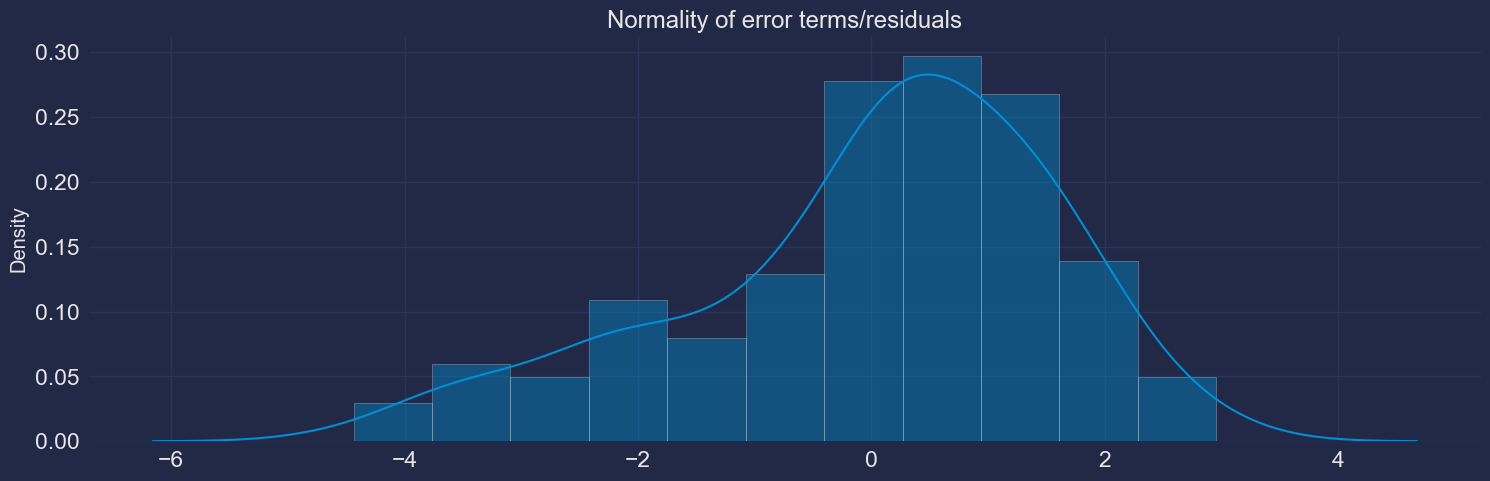

In [ ]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.show()

Los términos residuales tienen una distribución bastante normal para el número de puntos de prueba que tomamos. Recuerda el teorema del límite central que dice que a medida que aumenta el tamaño de la muestra, la distribución tiende a ser normal. Un sesgo también es visible en el gráfico. Es muy difícil obtener curvas perfectas, distribuciones en datos de la vida real.

## <a id="auto">5. Sin autocorrelación de residuos</a>

Cuando los residuos están autocorrelacionados, significa que el valor actual depende de los valores anteriores (históricos) y que existe un patrón inexplicable definido en la variable Y que aparece en los términos de error. Aunque es más evidente en los datos de series temporales.

En términos sencillos, la autocorrelación tiene lugar cuando hay un patrón en las filas de los datos. Esto es habitual en los datos de series de tiempo, ya que existe un patrón de tiempo para, por ejemplo. Efecto de la semana del día, que es un patrón muy famoso que se observa en los mercados bursátiles, donde la gente tiende a comprar más acciones hacia el comienzo de los fines de semana y tiende a vender más los lunes. Ha habido un gran estudio sobre este fenómeno y todavía es una cuestión de investigación en cuanto a qué factores reales causan esta tendencia.

No debe haber autocorrelación en los datos, por lo que los términos de error no deben formar ningún patrón.

**Por qué puede suceder:** En un escenario de serie temporal, podría haber información sobre el pasado que no estamos capturando. En un escenario sin series temporales, nuestro modelo podría estar sistemáticamente sesgado por debajo o por encima de la predicción en ciertas condiciones. Por último, esto podría ser el resultado de una violación de la suposición de linealidad.

**A qué afectará:** Esto afectará nuestras estimaciones del modelo.

**Cómo detectarlo:** Realizaremos una prueba de Durbin-Watson o Ljungbox para determinar si existe correlación positiva o negativa. Alternativamente, puede crear gráficos de autocorrelaciones residuales.

**Cómo solucionarlo:** Una solución simple de agregar variables de retraso puede solucionar este problema. Alternativamente, los términos de interacción, las variables adicionales o las transformaciones adicionales pueden solucionar esto

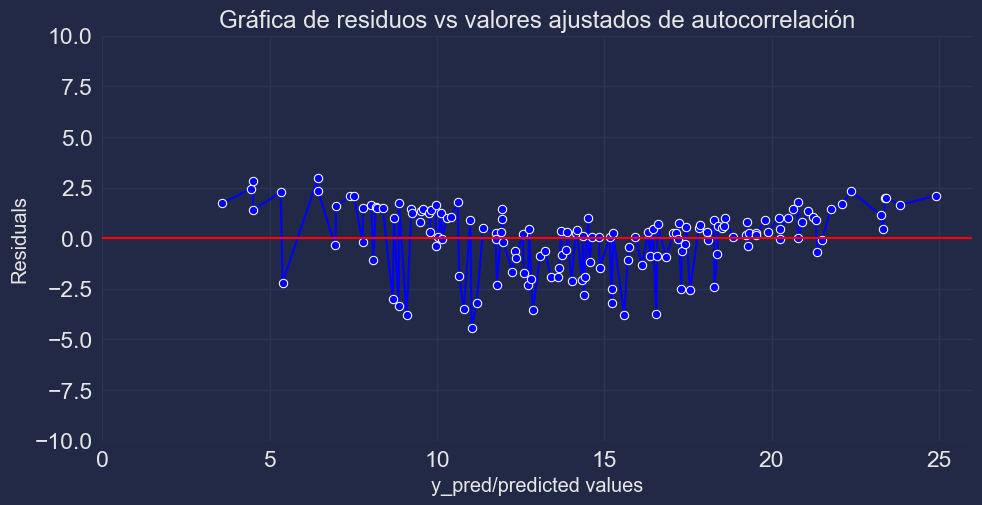

In [ ]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Gráfica de residuos vs valores ajustados de autocorrelación')
plt.show()

### Comprobación de la autocorrelación Para garantizar la ausencia de autocorrelación utilizamos la prueba de Ljungbox.
* Hipótesis Nula: La autocorrelación está ausente.
* Hipótesis alternativa: Autocorrelación está presente.

In [ ]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40).iloc[:,1])

0.00842557733996383

Dado que el valor de p es inferior a 0,05, rechazamos la hipótesis nula de que los términos de error no están autocorrelacionados.

In [ ]:
import statsmodels.api as sm

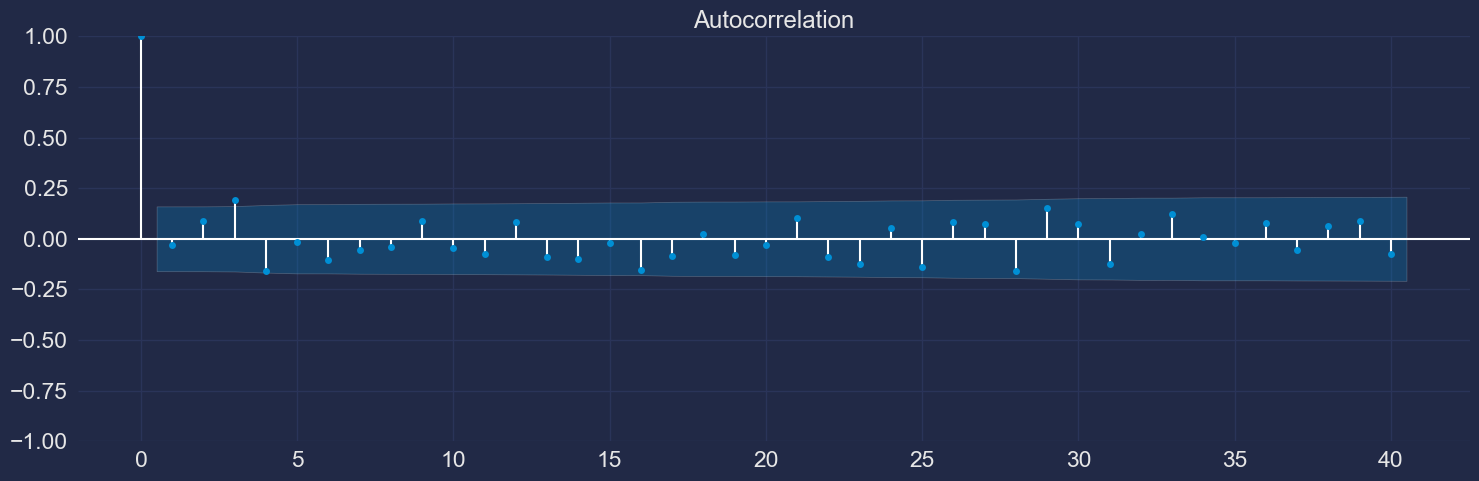

In [ ]:
# autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

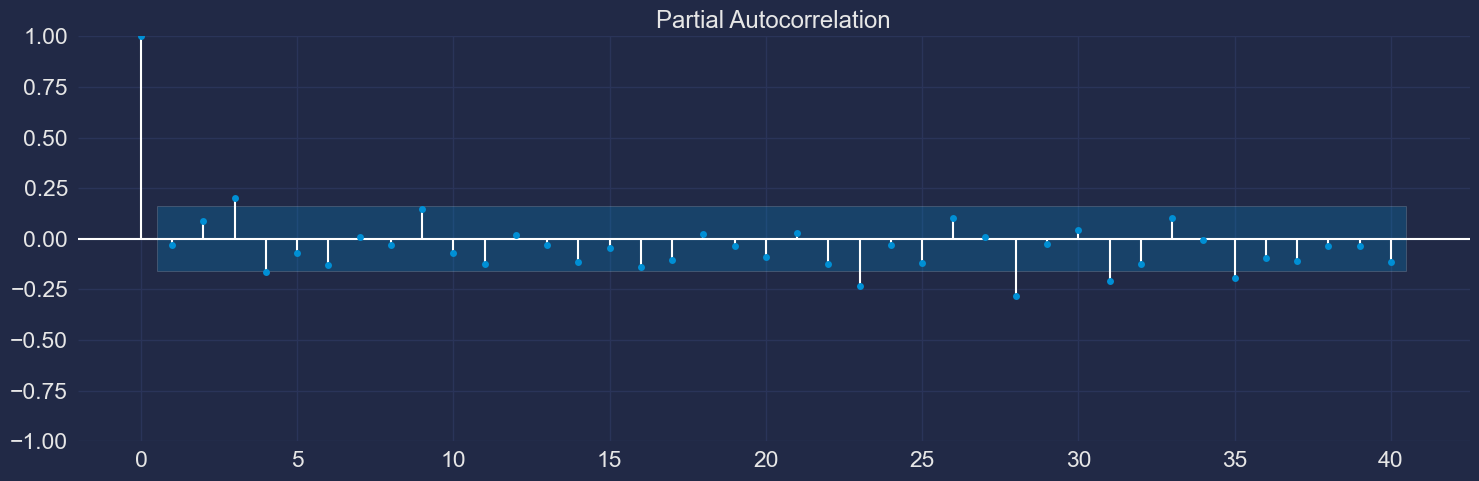

In [ ]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

Los resultados muestran signos de autocorrelación ya que hay picos fuera de la región roja del intervalo de confianza. Esto podría ser un factor de estacionalidad en los datos.

## <a id="multico">6. Sin multicolinealidad perfecta</a>

En la regresión, la multicolinealidad se refiere al grado en que las variables independientes están correlacionadas. La multicolinealidad afecta los coeficientes y los valores p, pero no influye en las predicciones, la precisión de las predicciones y las estadísticas de bondad de ajuste. Si su objetivo principal es hacer predicciones y no necesita comprender el rol de cada variable independiente, no necesita reducir la multicolinealidad severa.

**Por qué puede suceder:** Una gran cantidad de datos están naturalmente correlacionados. Por ejemplo, si tratamos de predecir el precio de una casa con pies cuadrados, el número de dormitorios y el número de baños, podemos esperar ver una correlación entre esas tres variables porque los dormitorios y los baños constituyen una parte de los pies cuadrados.

**A qué afectará:** La multicolinealidad causa problemas con la interpretación de los coeficientes. Específicamente, puede interpretar un coeficiente como "un aumento de 1 en este predictor resulta en un cambio de (coeficiente) en la variable de respuesta, manteniendo constantes todos los demás predictores". Esto se vuelve problemático cuando la multicolinealidad está presente porque no podemos mantener constantes los predictores correlacionados. Además, aumenta el error estándar de los coeficientes, lo que resulta en que potencialmente se muestren como estadísticamente insignificantes cuando realmente podrían ser significativos.

**Cómo detectarlo:** Hay algunas maneras, pero usaremos un mapa de calor de la correlación como ayuda visual y examinaremos el factor de inflación de varianza (VIF).

**Cómo solucionarlo:** Esto se puede arreglar mediante otros predictores de eliminación con un factor de inflación de varianza alta (VIF) o realizando una reducción de dimensionalidad.

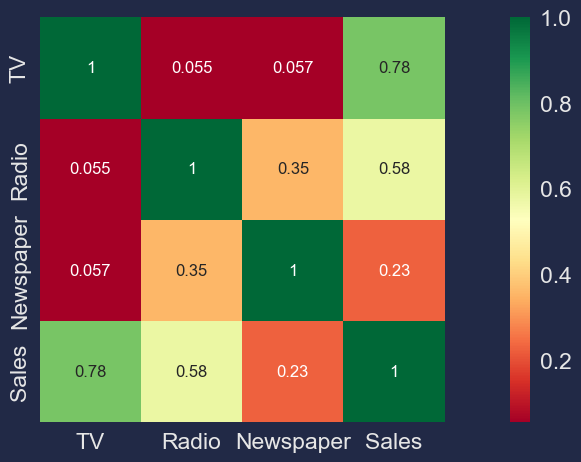

In [ ]:
plt.figure(figsize=(15,5))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(ad_data.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap
plt.show()

Busque la correlación de filas donde la variable dependiente (Ventas en este caso) no esté involucrada porque si una variable está correlacionada con la variable dependiente, esto sería una buena señal para nuestro modelo. La correlación dentro de las variables dependientes es lo que debemos buscar y evitar. Estos datos no contienen multicolinealidad perfecta entre variables independientes. En caso de que hubiera alguna, intentaríamos eliminar una de las variables correlacionadas según cuál fuera más importante para nuestro modelo de regresión.

Por lo tanto, la mayoría de los principales supuestos de la regresión lineal se cumplen con éxito. ¡Excelente! Dado que este fue uno de los conjuntos de datos más simples, demostró bien los pasos. Estos pasos se pueden aplicar en otros problemas para poder tomar mejores decisiones sobre qué modelo usar. Espero que esto actúe como una plantilla decente para aplicar a los datos.

# <a id="other"> 7. Some other model evaluations for fun</a>

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(random_state=0)
dec_tree.fit(X_train,y_train)
dec_tree_y_pred = dec_tree.predict(X_train)
print("Accuracy: {}".format(dec_tree.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=dec_tree_y_pred)))

Accuracy: 1.0
R squared: 1.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_tree = RandomForestRegressor(random_state=0)
rf_tree.fit(X_train,y_train)
rf_tree_y_pred = rf_tree.predict(X_train)
print("Accuracy: {}".format(rf_tree.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=rf_tree_y_pred)))

Accuracy: 0.9942583489121577
R squared: 0.9942583489121577


In [ ]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train,y_train)
svr_y_pred = svr.predict(X_train)
print("Accuracy: {}".format(svr.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=svr_y_pred)))

Accuracy: 0.9270308468624956
R squared: 0.9270308468624956


Tenga en cuenta que las puntuaciones son altas porque he usado los mismos datos para el entrenamiento y las pruebas. Esto también muestra cuán significativa es la división de datos, train_test_split(), etc. Esto es solo para fines de exploración del modelo. Además, casi no se realiza ningún ajuste de hiperparámetros en este punto para hacer de esta una representación simple, pero el ajuste puede mejorar mucho el tipo de aprendizaje que el modelo puede lograr y evitar el sobreajuste.

Reference:
* http://r-statistics.co/Assumptions-of-Linear-Regression.html
* https://www.statisticssolutions.com/assumptions-of-linear-regression/